<a href="https://colab.research.google.com/github/claarr/DataAnalyst-GreatEdu/blob/main/Final_Project_Sansevieria_(GreatEdu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sansevieria**
### **Project Leader** : Clarita Putri Anggraeni
### **Analyst** : Birru Asia Rayani, Agung Bima Wahyu Abadi
### **Visualizer** : Isdanial Sabian Shaputra, Ameliana Hanifa Putria

# **DATA PREPARATION**

In [1]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Membaca data
import pandas as pd
df = pd.read_excel('dataset2_statistik perumahan dan lingkungan.xlsx')
df.head()

,Unnamed: 0,pctg_milik_sendiri,pctg_kontrak,pctg_bebas_sewa,pctg_dinas,pctg_cuci_tangan_Air Kemasan\nBermerk,pctg_cuci_tangan_Air Isi Ulang,pctg_cuci_tangan_Leding,pctg_cuci_tangan_Sumur Bor/\nPompa,pctg_cuci_tangan_Sumur Terlindung,...,rata_rata_pengeluaran_gas_perkapita_per_bulan,proporsi_pengeluaran_rumah,proporsi_pengeluaran_listrik,proporsi_pengeluaran_air,pctg_air_bersih,pctg_air_tidakKeruh,pctg_air_tidakBerwarna,pctg_air_tidakBerasa,pctg_air_tidakBerbusa,pctg_air_tidakBerbau
0,Aceh,84.12,4.40,9.93,1.53,1.30,42.22,7.79,9.19,24.58,...,10997,0.36,2.31,0.28,94.68,96.72,97.97,98.61,99.80,98.83
1,Sumatera Utara,71.46,9.72,16.00,2.81,2.31,36.94,11.66,23.73,9.27,...,12776,0.81,2.99,0.49,95.69,97.48,98.29,98.74,99.71,99.03
2,Sumatera Barat,72.61,7.24,18.74,1.40,0.91,42.85,11.42,6.48,16.87,...,11744,0.58,2.52,0.41,97.46,98.18,98.90,99.05,99.57,99.14
3,R i a u,77.56,8.31,9.79,4.25,1.73,53.21,0.47,13.97,10.15,...,13789,0.67,3.48,0.12,96.21,98.98,98.26,98.74,99.90,99.02
4,J a m b i,87.28,3.40,8.15,1.18,2.55,23.94,10.73,6.97,28.86,...,16021,0.24,3.11,0.38,96.84,98.12,99.09,98.95,99.81,99.41


## **Mengubah Nama Kolom**
Supaya lebih enak dibaca dan mudah dipahami

In [3]:
# Menngecek nama kolom
df.columns

Index(['Unnamed: 0', 'pctg_milik_sendiri', 'pctg_kontrak', 'pctg_bebas_sewa',
       'pctg_dinas', 'pctg_cuci_tangan_Air Kemasan\nBermerk',
       'pctg_cuci_tangan_Air Isi Ulang', 'pctg_cuci_tangan_Leding',
       'pctg_cuci_tangan_Sumur Bor/\nPompa',
       'pctg_cuci_tangan_Sumur Terlindung',
       'pctg_cuci_tangan_Sumur Tak Terlindung', 'pctg_Mata Air Terlindung',
       'pctg_cuci_tangan_Mata Air Tak Terlindung',
       'pctg_cuci_tangan_Air Permukaan (Sungai/ Danau/ Waduk/ Kolam/\nIrigasi)',
       'pctg_cuci_tangan_Air Hujan', 'pctg_air_minum_layak',
       'pctg_listrik_pln', 'pctg_rumah_layak_huni', 'pctg_rumah_kumuh',
       'rata_rata_pengeluaran_sewa_perkapita_per_bulan',
       'rata_rata_pengeluaran_listrik_perkapita_per_bulan',
       'rata_rata_pengeluaran_air_perkapita_per_bulan',
       'rata_rata_pengeluaran_bahan_bakar_perkapita_per_bulan',
       'rata_rata_pengeluaran_gas_perkapita_per_bulan',
       'proporsi_pengeluaran_rumah', 'proporsi_pengeluaran_listrik',


In [4]:
# Mengubah nama kolom
df.rename(columns={'Unnamed: 0':'provinsi',
                     'pctg_milik_sendiri':'rumah_milik_sendiri',
                     'pctg_kontrak':'rumah_kontrak',
                     'pctg_bebas_sewa':'rumah_sewa',
                     'pctg_dinas':'rumah_dinas',
                     'pctg_cuci_tangan_Air Kemasan\nBermerk':'air_kemasan',
                     'pctg_cuci_tangan_Air Isi Ulang':'air_isi_ulang',
                     'pctg_cuci_tangan_Leding':'air_leding',
                     'pctg_cuci_tangan_Sumur Bor/\nPompa':'air_sumur_pompa',
                     'pctg_cuci_tangan_Sumur Terlindung':'air_sumur_terlindungi',
                     'pctg_cuci_tangan_Sumur Tak Terlindung':'air_sumur_takTerlindungi',
                     'pctg_Mata Air Terlindung':'air_terlindungi',
                     'pctg_cuci_tangan_Mata Air Tak Terlindung':'air_takTerlindungi',
                     'pctg_cuci_tangan_Air Permukaan (Sungai/ Danau/ Waduk/ Kolam/\nIrigasi)':'air_permukaan',
                     'pctg_cuci_tangan_Air Hujan':'air_hujan',
                     'pctg_air_minum_layak':'air_minum_layak',
                     'pctg_listrik_pln':'listrik_pln',
                     'pctg_rumah_layak_huni':'rumah_layak_huni',
                     'pctg_rumah_kumuh':'rumah_kumuh',
                     'rata_rata_pengeluaran_sewa_perkapita_per_bulan':'rata_rata_pengeluaran_sewa',
                     'rata_rata_pengeluaran_listrik_perkapita_per_bulan':'rata_rata_pengeluaran_listrik',
                     'rata_rata_pengeluaran_air_perkapita_per_bulan':'rata_rata_pengeluaran_air',
                     'rata_rata_pengeluaran_bahan_bakar_perkapita_per_bulan':'rata_rata_pengeluaran_bahanBakar',
                     'rata_rata_pengeluaran_gas_perkapita_per_bulan':'rata_rata_pengeluaran_gas',
                     'pctg_air_bersih':'air_bersih',
                     'pctg_air_tidakKeruh':'air_tidak_keruh',
                     'pctg_air_tidakBerwarna':'air_tidak_berwarna',
                     'pctg_air_tidakBerasa':'air_tidak_berasa',
                     'pctg_air_tidakBerbusa':'air_tidak_berbusa',
                     'pctg_air_tidakBerbau':'air_tidakBerbau'}, inplace=True)
df.columns

Index(['provinsi', 'rumah_milik_sendiri', 'rumah_kontrak', 'rumah_sewa',
       'rumah_dinas', 'air_kemasan', 'air_isi_ulang', 'air_leding',
       'air_sumur_pompa', 'air_sumur_terlindungi', 'air_sumur_takTerlindungi',
       'air_terlindungi', 'air_takTerlindungi', 'air_permukaan', 'air_hujan',
       'air_minum_layak', 'listrik_pln', 'rumah_layak_huni', 'rumah_kumuh',
       'rata_rata_pengeluaran_sewa', 'rata_rata_pengeluaran_listrik',
       'rata_rata_pengeluaran_air', 'rata_rata_pengeluaran_bahanBakar',
       'rata_rata_pengeluaran_gas', 'proporsi_pengeluaran_rumah',
       'proporsi_pengeluaran_listrik', 'proporsi_pengeluaran_air',
       'air_bersih', 'air_tidak_keruh', 'air_tidak_berwarna',
       'air_tidak_berasa', 'air_tidak_berbusa', 'air_tidakBerbau'],
      dtype='object')

## **Mengubah Tipe Data Menjadi Numerik**
Untuk mempermudah clustering dan korelasi

In [5]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   provinsi                          34 non-null     object 
 1   rumah_milik_sendiri               34 non-null     float64
 2   rumah_kontrak                     34 non-null     float64
 3   rumah_sewa                        34 non-null     float64
 4   rumah_dinas                       32 non-null     float64
 5   air_kemasan                       34 non-null     float64
 6   air_isi_ulang                     34 non-null     float64
 7   air_leding                        34 non-null     float64
 8   air_sumur_pompa                   34 non-null     float64
 9   air_sumur_terlindungi             34 non-null     float64
 10  air_sumur_takTerlindungi          32 non-null     float64
 11  air_terlindungi                   33 non-null     float64
 12  air_takTer

In [6]:
# Mengubah tipe data pada kolom provinsi menjadi numerik

df['provinsi'] = LabelEncoder().fit_transform(df['provinsi'])
df['provinsi']

0      0
1     33
2     31
3     25
4      7
5     32
6      3
7     18
8     16
9     17
10     5
11     8
12     9
13     4
14    10
15     2
16     1
17    21
18    22
19    11
20    13
21    12
22    14
23    15
24    30
25    28
26    27
27    29
28     6
29    26
30    19
31    20
32    24
33    23
Name: provinsi, dtype: int64

## **Mengisi Data yang Null (NaN)**
Mengisi data menggunakan nilai median

In [7]:
# Melihat jumlah data yang null di tiap kolom
df.isnull().sum()

provinsi                            0
rumah_milik_sendiri                 0
rumah_kontrak                       0
rumah_sewa                          0
rumah_dinas                         2
air_kemasan                         0
air_isi_ulang                       0
air_leding                          0
air_sumur_pompa                     0
air_sumur_terlindungi               0
air_sumur_takTerlindungi            2
air_terlindungi                     1
air_takTerlindungi                  3
air_permukaan                       5
air_hujan                           7
air_minum_layak                     0
listrik_pln                         0
rumah_layak_huni                    0
rumah_kumuh                         0
rata_rata_pengeluaran_sewa          2
rata_rata_pengeluaran_listrik       0
rata_rata_pengeluaran_air           0
rata_rata_pengeluaran_bahanBakar    0
rata_rata_pengeluaran_gas           0
proporsi_pengeluaran_rumah          0
proporsi_pengeluaran_listrik        0
proporsi_pen

In [9]:
# Melihat statistik deskriptif dari kolom yang memiliki null
df[['rumah_dinas',
    'air_sumur_takTerlindungi',
    'air_terlindungi',
    'air_takTerlindungi',
    'air_permukaan',
    'air_hujan',
    'rata_rata_pengeluaran_sewa']].describe()

,rumah_dinas,air_sumur_takTerlindungi,air_terlindungi,air_takTerlindungi,air_permukaan,air_hujan,rata_rata_pengeluaran_sewa
count,32.000000,32.000000,33.000000,31.000000,29.000000,27.000000,32.000000
mean,1.277188,3.598750,9.729394,2.689355,2.430345,5.827407,9678.937500
std,1.217171,3.902532,7.478018,3.558166,2.580792,8.939379,10102.973698
min,0.070000,0.000000,0.910000,0.540000,0.000000,0.120000,1508.000000
25%,0.355000,1.697500,3.670000,1.140000,0.320000,0.645000,3360.750000
50%,0.985000,2.545000,8.560000,1.650000,1.350000,2.570000,5510.500000
75%,1.642500,3.587500,13.190000,2.795000,3.440000,6.815000,12776.500000
max,5.360000,20.720000,30.040000,20.190000,8.070000,42.080000,49559.000000


In [10]:
# Mengisi data yang null dengan nilai median
df.fillna(df.median().round(2), inplace=True)
df[['rumah_dinas',
    'air_sumur_takTerlindungi',
    'air_terlindungi',
    'air_takTerlindungi',
    'air_permukaan',
    'air_hujan',
    'rata_rata_pengeluaran_sewa']]

,rumah_dinas,air_sumur_takTerlindungi,air_terlindungi,air_takTerlindungi,air_permukaan,air_hujan,rata_rata_pengeluaran_sewa
0,1.53,2.86,8.06,1.20,2.31,0.33,4420.0
1,2.81,2.33,8.25,1.94,0.91,2.57,10563.0
2,1.40,3.16,10.58,5.11,1.35,1.23,8167.0
3,4.25,1.61,2.41,0.85,0.32,15.27,10217.0
4,1.18,10.42,4.05,1.65,3.44,7.28,3461.0
5,0.60,4.39,2.61,1.29,1.91,5.95,3391.0
6,1.00,20.72,7.26,3.30,1.26,2.57,4238.0
7,0.18,10.76,4.27,3.02,0.77,0.19,3184.0
8,0.99,5.21,0.91,0.54,1.35,2.57,5341.0
9,0.55,2.65,1.35,1.08,0.11,2.57,31118.0


In [11]:
# Mengecek lagi kolom apakah masih ada yang null
df.isnull().sum()

provinsi                            0
rumah_milik_sendiri                 0
rumah_kontrak                       0
rumah_sewa                          0
rumah_dinas                         0
air_kemasan                         0
air_isi_ulang                       0
air_leding                          0
air_sumur_pompa                     0
air_sumur_terlindungi               0
air_sumur_takTerlindungi            0
air_terlindungi                     0
air_takTerlindungi                  0
air_permukaan                       0
air_hujan                           0
air_minum_layak                     0
listrik_pln                         0
rumah_layak_huni                    0
rumah_kumuh                         0
rata_rata_pengeluaran_sewa          0
rata_rata_pengeluaran_listrik       0
rata_rata_pengeluaran_air           0
rata_rata_pengeluaran_bahanBakar    0
rata_rata_pengeluaran_gas           0
proporsi_pengeluaran_rumah          0
proporsi_pengeluaran_listrik        0
proporsi_pen

## **Mengecek Data Duplikat**

In [12]:
# Mengecek data duplikat
df.duplicated().sum()

0

## **Mengecek Outlier Menggunakan Boxplot**

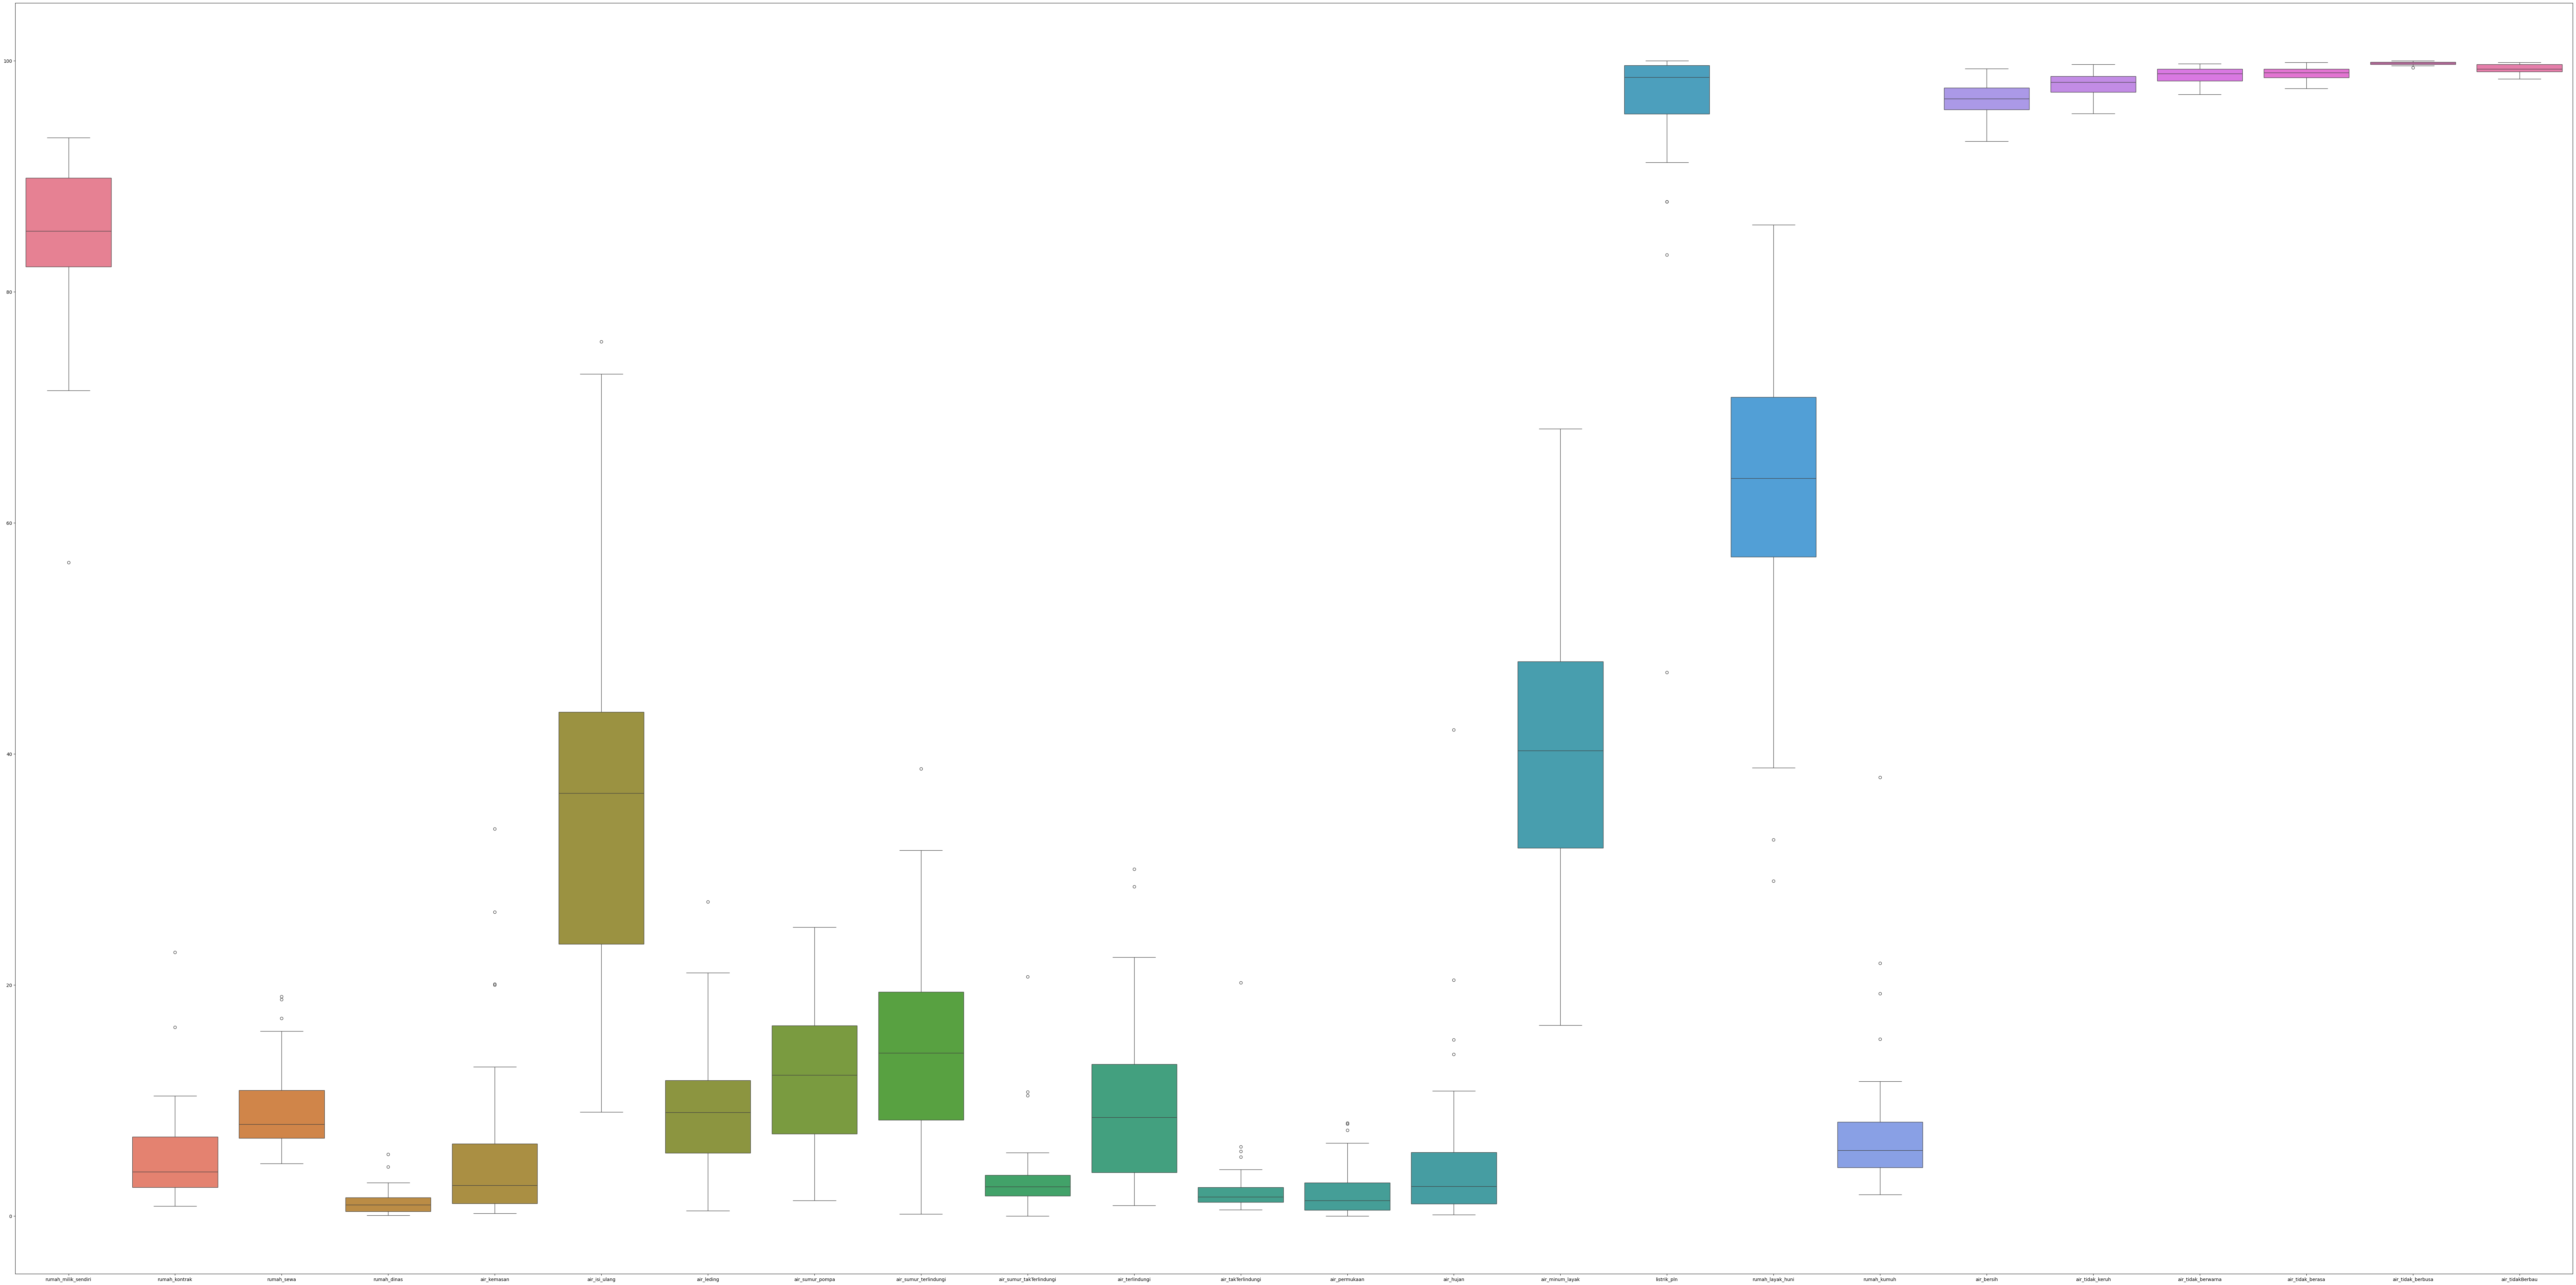

In [13]:
# Plot boxplot
plt.figure(figsize=(100, 50))
sns.boxplot(df[['rumah_milik_sendiri', 'rumah_kontrak', 'rumah_sewa',
       'rumah_dinas', 'air_kemasan', 'air_isi_ulang', 'air_leding',
       'air_sumur_pompa', 'air_sumur_terlindungi', 'air_sumur_takTerlindungi',
       'air_terlindungi', 'air_takTerlindungi', 'air_permukaan', 'air_hujan',
       'air_minum_layak', 'listrik_pln', 'rumah_layak_huni', 'rumah_kumuh', 'air_bersih', 'air_tidak_keruh', 'air_tidak_berwarna',
       'air_tidak_berasa', 'air_tidak_berbusa', 'air_tidakBerbau']])
plt.show()

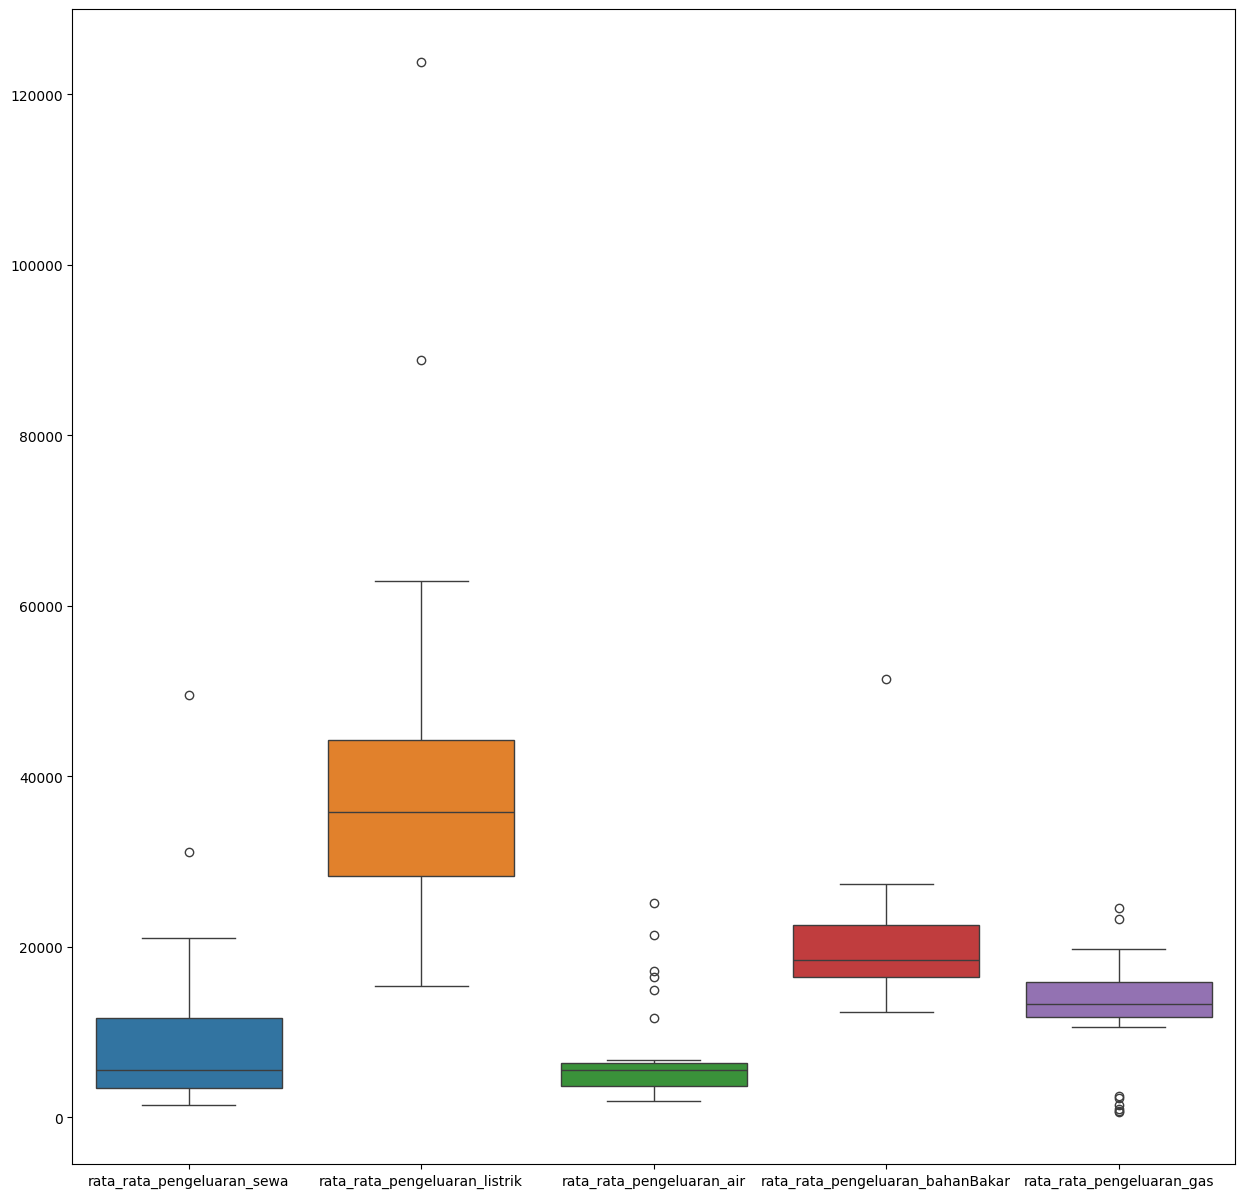

In [14]:
# Plot boxplot
plt.figure(figsize=(15, 15))
sns.boxplot(df[['rata_rata_pengeluaran_sewa', 'rata_rata_pengeluaran_listrik',
       'rata_rata_pengeluaran_air', 'rata_rata_pengeluaran_bahanBakar',
       'rata_rata_pengeluaran_gas']])
plt.show()

# **MODELLING**

## **Pemilihan Variabel Untuk Clustering**

In [15]:
# Menggunakan hanya dua variabel yang diinginkan untuk clustering
selected_features = df[['air_minum_layak', 'rumah_layak_huni']]

## **Standarisasi Data (Scaling)**
Untuk memastikan bahwa semua variabel memiliki bobot yang sama dan mencegah variabel dengan rentang nilai yang lebih besar mendominasi hasil clustering

In [16]:
# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
scaled_features

array([[-0.05702177,  0.27485157],
       [ 0.43739421,  0.67951319],
       [ 0.07714136, -0.21170585],
       [-0.39408592,  0.72608139],
       [ 0.94174819,  0.13113247],
       [ 1.36825443, -0.05353454],
       [ 0.72890915, -0.62198776],
       [ 1.32684606,  0.05325116],
       [-1.41107556, -2.40201714],
       [-1.78789175, -0.66454147],
       [-1.2090027 , -1.90181042],
       [ 0.05726534, -0.66775307],
       [ 1.14547738,  0.51090418],
       [ 2.32810052,  1.87101684],
       [ 1.07591132,  0.66265229],
       [-0.20277924,  0.04602506],
       [ 0.37859432,  1.74817314],
       [ 1.04030012,  0.30696757],
       [-0.20360741, -1.58867941],
       [ 1.36494176,  0.13434407],
       [-0.99947633, -0.48148026],
       [ 0.10198639, -0.40038736],
       [-1.94938441,  1.07052551],
       [-1.44337409,  0.71805239],
       [-0.24418761,  0.7951308 ],
       [-0.25661012, -0.23177835],
       [ 0.41586185,  0.75418289],
       [ 0.37528165,  0.9252006 ],
       [-1.10879444,

## **Menentukan Jumlah CLuster (Elbow Method)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

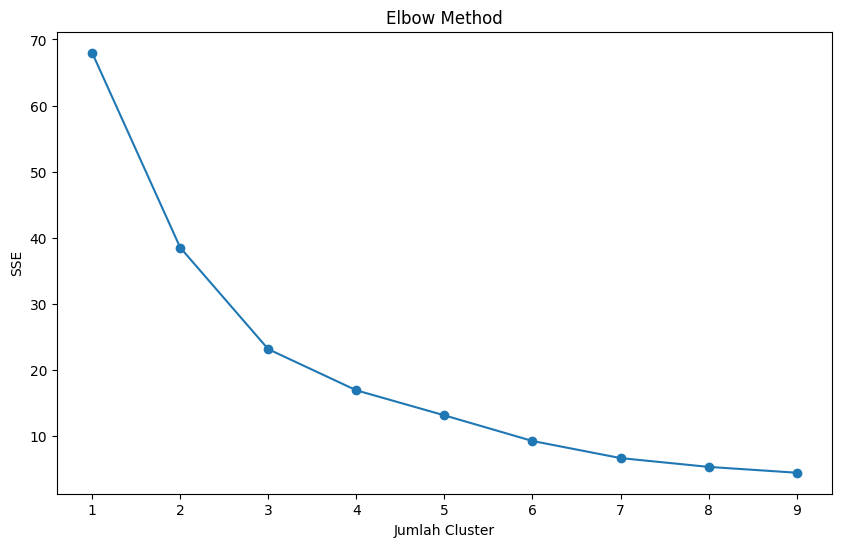

In [17]:
# Implementasi Metode Elbow
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
k_range = range(1, 10)

# Cek nilai SSE setiap k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot SSE untuk Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [18]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=68.0
k=2; SSE=38.54628620104178
k=3; SSE=23.18647228324334
k=4; SSE=16.964382551101696
k=5; SSE=13.181308098941791
k=6; SSE=9.304045949471792
k=7; SSE=6.71967490940842
k=8; SSE=5.388625100838747
k=9; SSE=4.506799768095078


In [19]:
# Tentukan jumlah cluster optimal (misal: 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1], dtype=int32)

In [20]:
# Tambahkan hasil cluster ke dataframe asli (dengan kolom provinsi untuk interpretasi)
df['cluster'] = clusters
df

,provinsi,rumah_milik_sendiri,rumah_kontrak,rumah_sewa,rumah_dinas,air_kemasan,air_isi_ulang,air_leding,air_sumur_pompa,air_sumur_terlindungi,...,proporsi_pengeluaran_rumah,proporsi_pengeluaran_listrik,proporsi_pengeluaran_air,air_bersih,air_tidak_keruh,air_tidak_berwarna,air_tidak_berasa,air_tidak_berbusa,air_tidakBerbau,cluster
0,0,84.12,4.40,9.93,1.53,1.30,42.22,7.79,9.19,24.58,...,0.36,2.31,0.28,94.68,96.72,97.97,98.61,99.80,98.83,2
1,33,71.46,9.72,16.00,2.81,2.31,36.94,11.66,23.73,9.27,...,0.81,2.99,0.49,95.69,97.48,98.29,98.74,99.71,99.03,0
2,31,72.61,7.24,18.74,1.40,0.91,42.85,11.42,6.48,16.87,...,0.58,2.52,0.41,97.46,98.18,98.90,99.05,99.57,99.14,2
3,25,77.56,8.31,9.79,4.25,1.73,53.21,0.47,13.97,10.15,...,0.67,3.48,0.12,96.21,98.98,98.26,98.74,99.90,99.02,2
4,7,87.28,3.40,8.15,1.18,2.55,23.94,10.73,6.97,28.86,...,0.24,3.11,0.38,96.84,98.12,99.09,98.95,99.81,99.41,0
5,32,84.71,3.71,10.98,0.60,1.21,20.49,16.46,13.96,31.67,...,0.28,2.97,0.50,96.24,97.32,98.15,99.13,99.70,99.23,0
6,3,88.38,3.93,6.69,1.00,0.29,14.30,11.34,14.64,26.78,...,0.32,2.61,0.27,96.85,97.98,99.01,99.05,99.66,98.81,0
7,18,92.40,2.45,4.96,0.18,4.39,18.57,2.44,16.88,38.71,...,0.26,2.85,0.16,97.45,98.48,99.20,99.10,99.90,99.48,0
8,16,88.65,3.95,6.41,0.99,5.92,58.41,2.11,7.78,18.77,...,0.31,3.35,0.17,99.32,99.65,99.68,99.78,99.90,99.84,1
9,17,72.97,16.35,9.89,0.55,20.10,55.67,7.11,4.14,7.36,...,1.56,4.47,0.86,98.95,99.69,99.47,99.33,99.90,99.70,2


## **Visualisasi Clustering (Air Minum Layak & Rumah Layak Huni)**

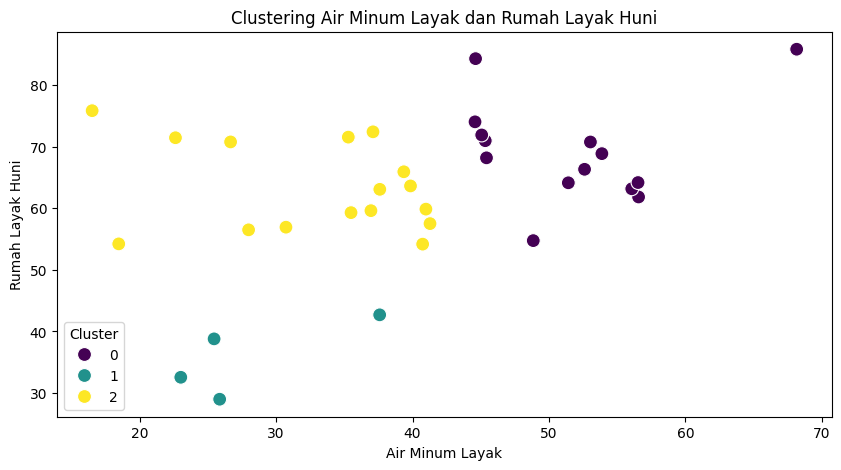

In [21]:
# Visualisasi plot hasil klaster
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='air_minum_layak', y='rumah_layak_huni', s=100, hue='cluster', palette='viridis')

# Plot centroid
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200, alpha=0.5, label='centroid')

plt.title('Clustering Air Minum Layak dan Rumah Layak Huni')
plt.xlabel('Air Minum Layak')
plt.ylabel('Rumah Layak Huni')
plt.legend(title='Cluster')
plt.show()

In [22]:
hasil_clustering = df[['cluster', 'provinsi','air_minum_layak', 'rumah_layak_huni']].sort_values(by='cluster', ascending=True)
hasil_clustering

,cluster,provinsi,air_minum_layak,rumah_layak_huni
16,0,1,44.62,84.26
1,0,33,45.33,70.95
31,0,20,45.42,68.17
27,0,29,44.58,74.01
4,0,7,51.42,64.12
5,0,32,56.57,61.82
6,0,3,48.85,54.74
7,0,18,56.07,63.15
26,0,27,45.07,71.88
19,0,11,56.53,64.16


## **Export Data Hasil CLustering**

In [23]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('df_bersih.csv', index=False)

# **EVALUATION**
 untuk mengukur seberapa baik data telah dikelompokkan menjadi klaster-klaster yang terpisah dan terdefinisi dengan baik.

In [24]:
# Evaluasi clustering dengan Silhouette Score
score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.40179960247600494


Dengan demikian, Silhouette Score sebesar 0.40179960247600494 menunjukkan bahwa klasterisasi memberikan hasil yang relatif baik dalam memisahkan data ke dalam kelompok-kelompok yang berbeda karena mendekati 1 dan bernilai positif.

## **Analisis Cluster**
untuk mendapatkan pemahaman yang lebih dalam tentang karakteristik atau pola yang ada di setiap klaster setelah proses klasterisasi

In [25]:
# Menghitung rata-rata dari setiap fitur dalam setiap cluster
cluster_summary = df.groupby('cluster')[['air_minum_layak', 'rumah_layak_huni']].mean()
print(cluster_summary)

         air_minum_layak  rumah_layak_huni
cluster                                   
0              51.582143         69.210714
1              27.977500         35.770000
2              32.974375         63.282500


# **ANALISIS LAMA**

Dari hasil ini, dapat disimpulkan bahwa klasterisasi telah berhasil memisahkan provinsi-provinsi ke dalam kelompok-kelompok yang memiliki karakteristik yang berbeda dalam hal persentase air minum layak dan persentase rumah layak huni.

### Rumah layak huni dan Air Minum Layak

In [ ]:
# Memilih data untuk di CLustering
x = data[['pctg_rumah_layak_huni','pctg_air_minum_layak']]

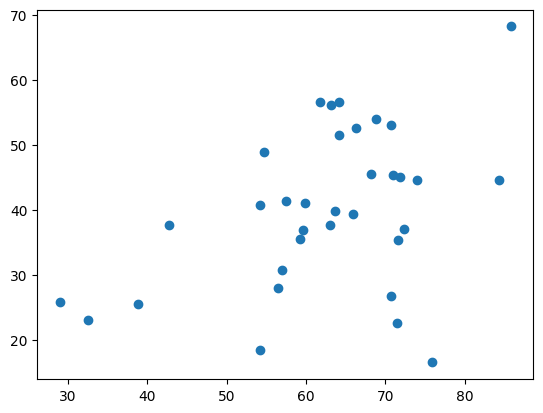

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(data['pctg_rumah_layak_huni'], data['pctg_air_minum_layak'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

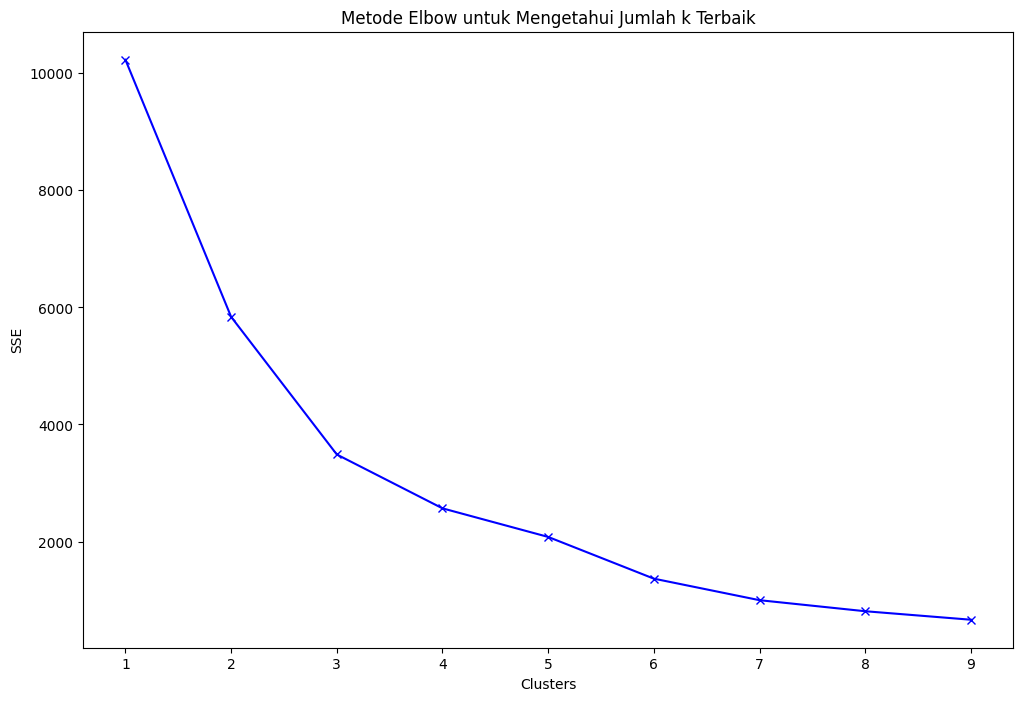

In [ ]:
# Implementasi Metode Elbow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(12,8))
plt.plot(K, sse, "bx-")
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=10231.462570588235
k=2; SSE=5838.896675000002
k=3; SSE=3487.3514973214283
k=4; SSE=2567.005091794872
k=5; SSE=2078.410032449495
k=6; SSE=1365.7747257142855
k=7; SSE=997.8031353174603
k=8; SSE=809.1465333333332
k=9; SSE=664.0260142857139


In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km3.labels_

array([0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1], dtype=int32)

In [ ]:
x['labels'] = km3.labels_
x

<ipython-input-18-f5183093b38c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['labels'] = km3.labels_


,pctg_rumah_layak_huni,pctg_air_minum_layak,labels
0,65.91,39.36,0
1,70.95,45.33,2
2,59.85,40.98,0
3,71.53,35.29,0
4,64.12,51.42,2
5,61.82,56.57,2
6,54.74,48.85,2
7,63.15,56.07,2
8,32.57,23.01,1
9,54.21,18.46,0


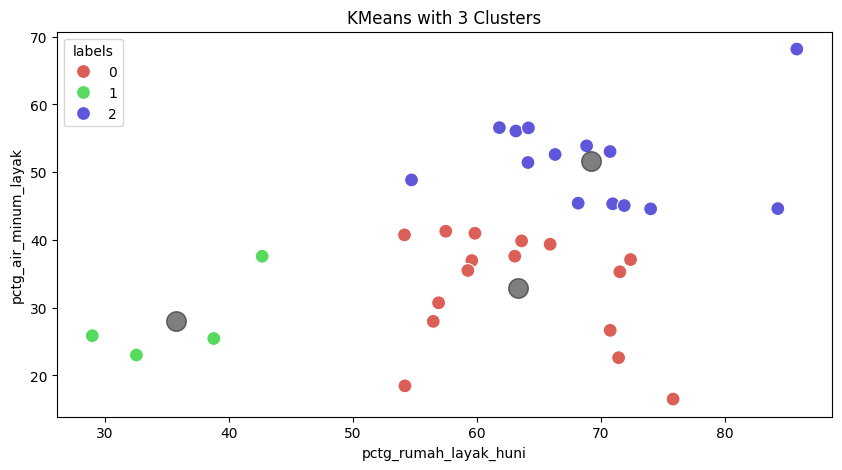

In [ ]:
import seaborn as sns

# Plot hasi cluster berdasarkan rumah layak huni dan air minum layak
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x['pctg_rumah_layak_huni'], y=x['pctg_air_minum_layak'], s=100, hue=x['labels'], palette=sns.color_palette('hls', 3))

# Plot centroid
centers = km3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('KMeans with 3 Clusters')
plt.show()

- Cluster 0 = daerah yang memiliki pctg rumah layak huni tinggi dan air minum layak rendah
- Cluster 1 = daerah yang memiliki pctg rumah layak huni rendah dan air minum layak rendah
- Cluster 2 = daerah yang memiliki pctg rumah layak huni tinggi dan air minum tinggi

### Rumah layak huni, Air Minum layak, dan Listrik PLN

In [ ]:
# Memilih data untuk di korelasi
b = data[['pctg_rumah_layak_huni','pctg_air_minum_layak','pctg_listrik_pln']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

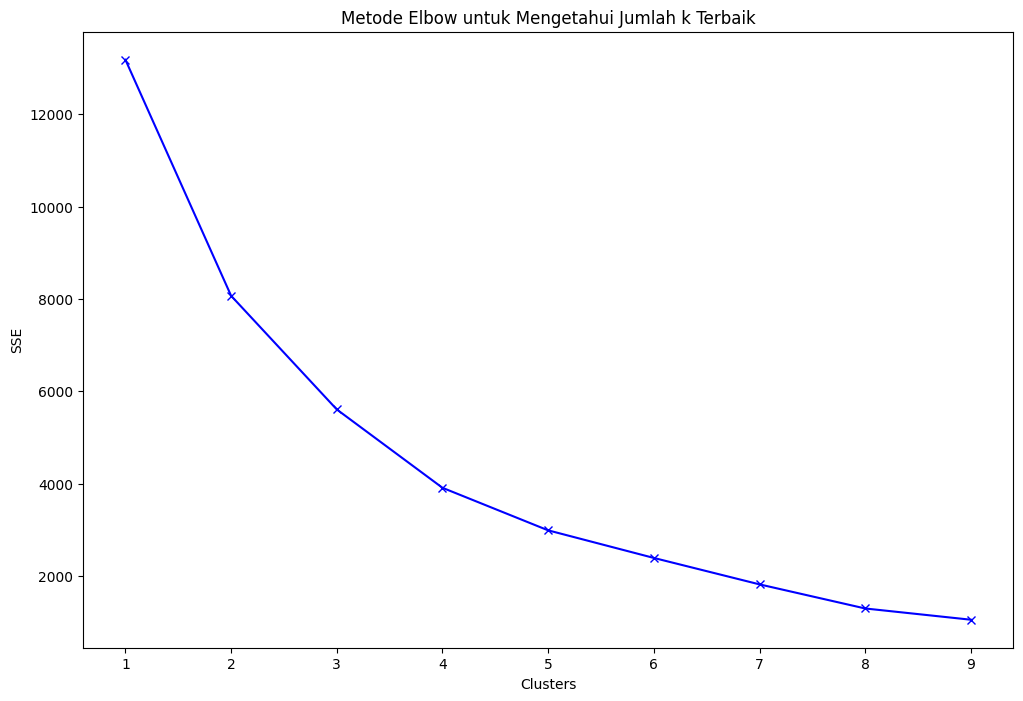

In [ ]:
# Implementasi Metode Elbow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(b)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(12,8))
plt.plot(K, sse, "bx-")
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=13181.303844117647
k=2; SSE=8067.937694179895
k=3; SSE=5605.480648496241
k=4; SSE=3908.655345952381
k=5; SSE=2986.9420601748257
k=6; SSE=2389.1061488636365
k=7; SSE=1816.5502766666664
k=8; SSE=1294.4684317460315
k=9; SSE=1050.9424817460317


In [ ]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(b)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km4.labels_

array([3, 0, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2], dtype=int32)

In [ ]:
b['kelompok'] = km4.labels_
b

<ipython-input-26-5306447a9d48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['kelompok'] = km4.labels_


,pctg_rumah_layak_huni,pctg_air_minum_layak,pctg_listrik_pln,kelompok
0,65.91,39.36,99.67,3
1,70.95,45.33,98.90,0
2,59.85,40.98,98.99,3
3,71.53,35.29,95.54,3
4,64.12,51.42,98.67,0
5,61.82,56.57,96.77,0
6,54.74,48.85,99.45,0
7,63.15,56.07,98.90,0
8,32.57,23.01,99.55,1
9,54.21,18.46,97.85,1


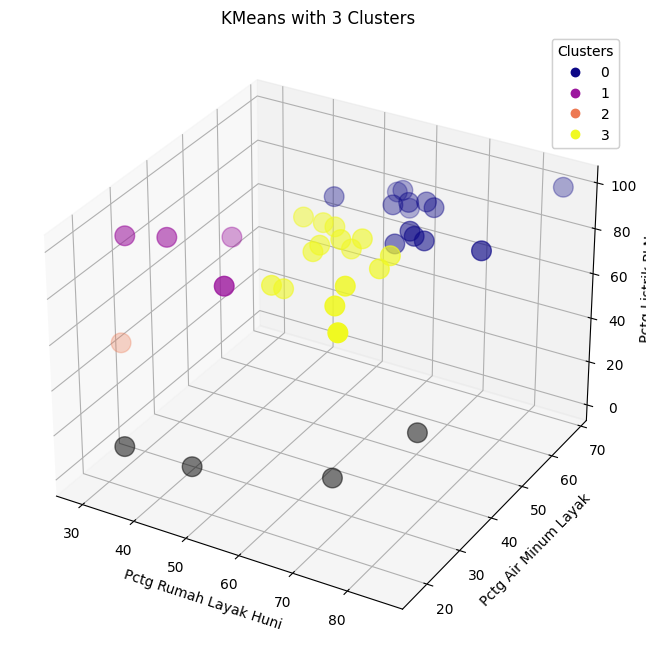

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Membuat figure dan axes 3D
fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter 3D
scatter = ax.scatter(b['pctg_rumah_layak_huni'], b['pctg_air_minum_layak'], b['pctg_listrik_pln'], s=200, c=b['kelompok'], cmap='plasma')

# Plot centroid
centers = km4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Menambahkan label sumbu
ax.set_xlabel('Pctg Rumah Layak Huni')
ax.set_ylabel('Pctg Air Minum Layak')
ax.set_zlabel('Pctg Listrik PLN')

# Menambahkan legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Menambahkan judul
plt.title('KMeans with 3 Clusters')

# Menampilkan plot
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Membuat scatter plot 3D
fig = go.Figure(data=[go.Scatter3d(
    x=b['pctg_rumah_layak_huni'],
    y=b['pctg_air_minum_layak'],
    z=b['pctg_listrik_pln'],
    mode='markers',
    marker=dict(
        size=12,
        color=b['kelompok'],
        colorscale='plasma',
        opacity=0.8
    )
)])

# Menambahkan centroid
centers = km4.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color='black',
        opacity=0.5
    )
))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Pctg Rumah Layak Huni',
                    yaxis_title='Pctg Air Minum Layak',
                    zaxis_title='Pctg Listrik PLN'),
                    )

# Menambahkan judul
fig.update_layout(title='KMeans with 3 Clusters')

# Menampilkan plot
fig.show()


## **KORELASI**

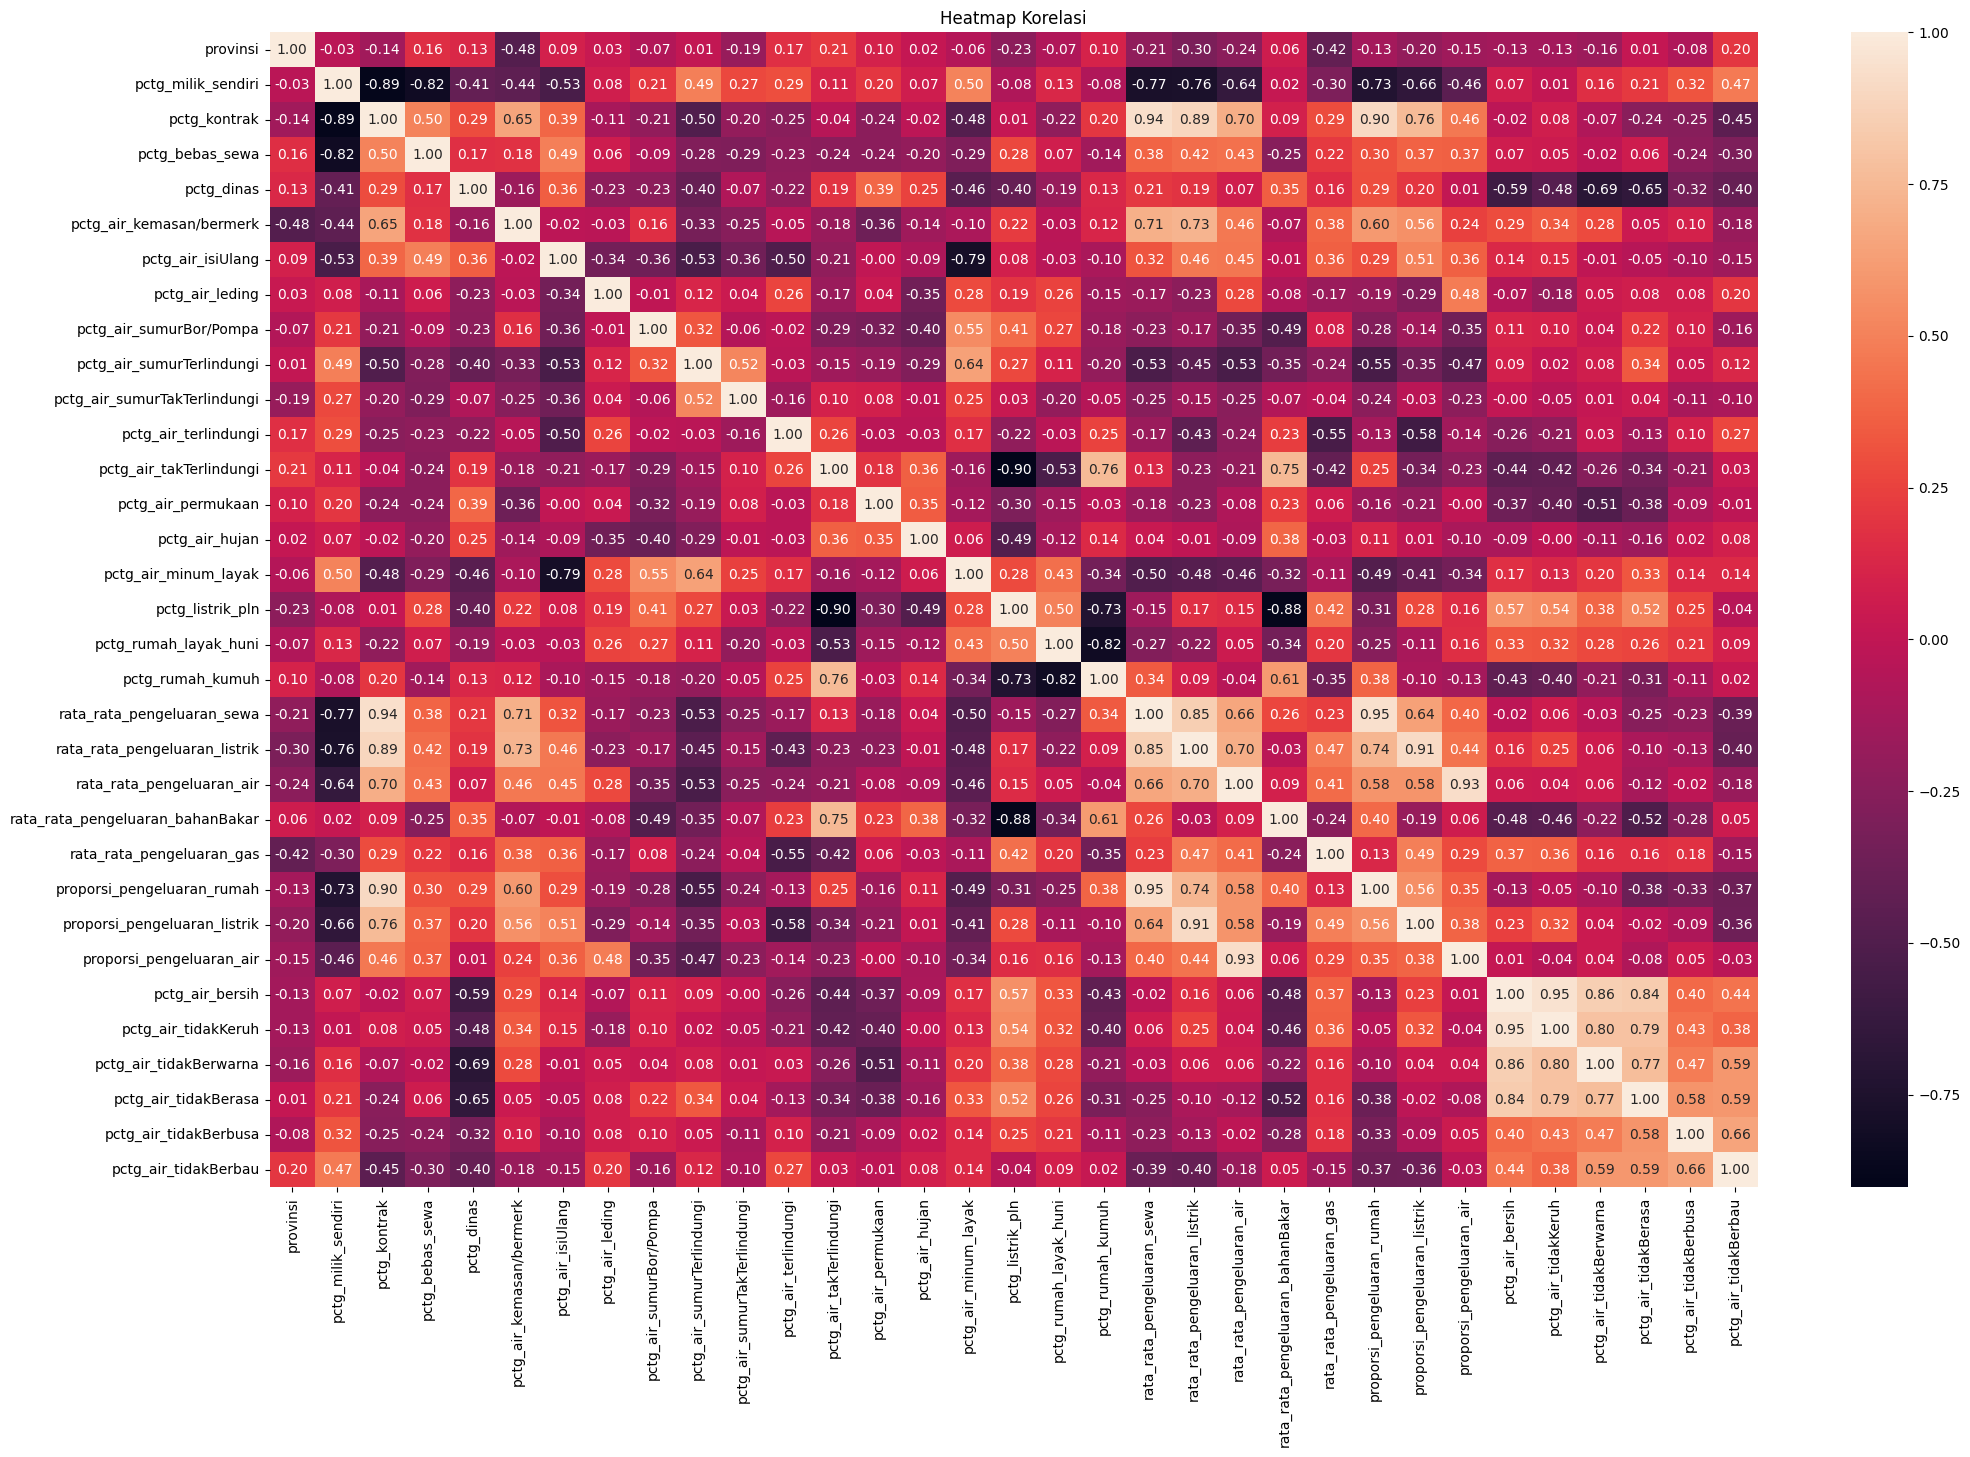

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi
plt.figure(figsize=(24, 15))
# sns.heatmap(data.corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

## vdfv